In [ ]:
import polars as pl

df = pl.read_csv("../data/Mental_Health_and_Social_Media_Balance_Dataset.csv")
df.head()

In [ ]:
df = df.to_dummies(columns=["Gender", "Social_Media_Platform"])
df.head()

In [ ]:
df = df.rename({
    'Sleep_Quality(1-10)': 'Sleep_Quality',
    'Stress_Level(1-10)': 'Stress_Level',
    'Exercise_Frequency(week)': 'Exercise_Frequency',
    'Daily_Screen_Time(hrs)':'Daily_Screen_Time',
    'Social_Media_Platform_X (Twitter)' : 'Social_Media_Platform_X',
    'Happiness_Index(1-10)' : 'Happiness_Index'
})

df.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_clean = df.drop_nulls()

X = df_clean.drop("Stress_Level", "User_ID", "Happiness_Index").to_numpy()
y = df_clean["Stress_Level"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

model = LinearRegression()
model.fit(X_train, y_train)

+ Stress Level Korreliert sehr stark mit Happiness_Index : Frage ist ob man das haben will oder nicht (ähnliche Metrik meiner mng nach)
+ Für den Tree ist Level 3 ohne und Level 4 mit Stress am besten

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")

In [ ]:
import matplotlib.pyplot as plt

# Get feature names (excluding 'User_ID' and 'Stress_Level')
feature_names = [name for name in df_clean.columns if name not in ["User_ID", "Stress_Level", "Happiness_Index"]]

# Get coefficients from the trained model
coefficients = model.coef_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3, random_state=41)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")

# Compute and plot feature importances from the trained DecisionTreeRegressor
importances = model.feature_importances_

# Pair names with importances and sort descending
feat_imp_pairs = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print top 5 features
print("Top 5 features by importance:")
for name, imp in feat_imp_pairs[:5]:
    print(f"{name}: {imp:.4f}")

# Prepare plotting (largest on top)
names_sorted, importances_sorted = zip(*feat_imp_pairs)
plt.figure(figsize=(10, 6))
plt.barh(names_sorted[::-1], importances_sorted[::-1])
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.show()

Train R² Score: 0.8887
Test R² Score: 0.5170
Top 5 features by importance:
Daily_Screen_Time: 0.6100
Age: 0.0903
Days_Without_Social_Media: 0.0743
Exercise_Frequency: 0.0655
Sleep_Quality: 0.0412


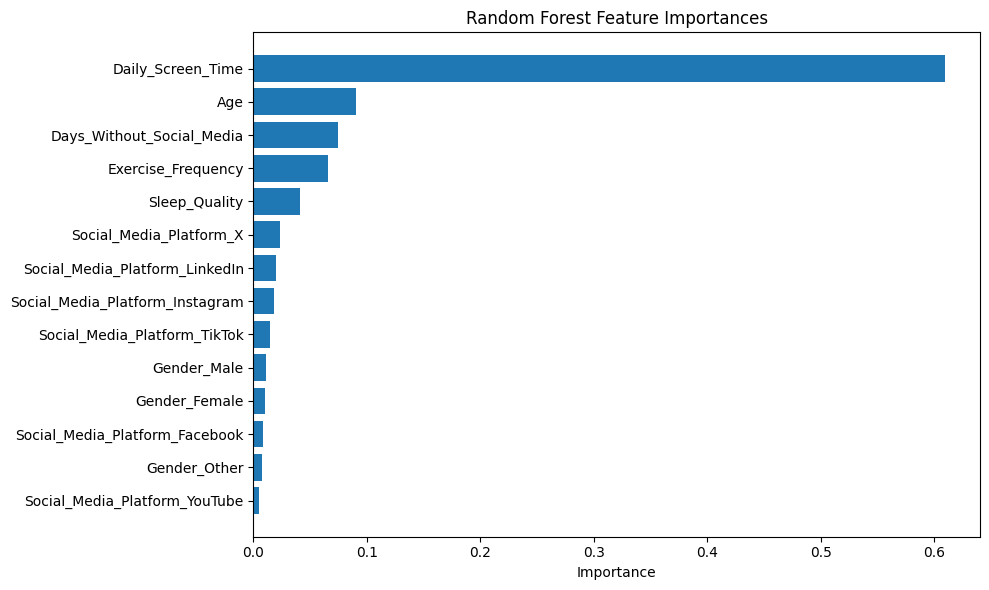

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=7, random_state=41)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")

importances = model.feature_importances_
feat_imp_pairs = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Top 5 features by importance:")
for name, imp in feat_imp_pairs[:5]:
    print(f"{name}: {imp:.4f}")

names_sorted, importances_sorted = zip(*feat_imp_pairs)
plt.figure(figsize=(10, 6))
plt.barh(names_sorted[::-1], importances_sorted[::-1])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [11]:

X_single = df_clean["Daily_Screen_Time"].to_numpy().reshape(-1, 1)
y_single = df_clean["Stress_Level"].to_numpy()


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.2, random_state=41)

lr = LinearRegression()
lr.fit(X_train_s, y_train_s)

r2_train = lr.score(X_train_s, y_train_s)
r2_test = lr.score(X_test_s, y_test_s)
print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")




Train R²: 0.5239
Test  R²: 0.6129
